In [29]:
import numpy
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Задание

1. Разработать линейный конгруэнтный ГПСЧ.
2. Проверить равномерность распределения получаемой последовательности. Для этого построить гистограмму для получаемой последовательности и сравнить её с идеальной теоретической формой.
3. Найти длину периода генератора. Для этого определить элемент последовательности, заведомо лежащий внутри периода и подсчитать количество итераций до повторного появления в последовательности этого элемента.
4. Проверить качество младших разрядов последовательности. Для этого построить новую последовательность, элементы которой состоят из нескольких младших разрядов членов основной последовательности и выполнить для неё пункты 2 и 3 задания.

In [30]:
# 1. Разработать линейный конгруэнтный ГПСЧ.
class PseudoRandomGenerator:
  def __init__(self, module: int, multiplier: int, increment: int, seed: int):
    if not (0 <= seed < module):
      raise ValueError('seed (start value) must be in [0 and module)')
    if not (0 <= increment < module):
      raise ValueError('increment must be in [0 and module)')
    if not (0 <= multiplier < module):
      raise ValueError('multiplier must be in [0 and module)')
    
    self.module = module
    self.multiplier = multiplier
    self.increment = increment
    self.current = seed

  def next(self):
    self.current = (self.multiplier * self.current + self.increment) % self.module
    return self.current

In [38]:
INCREMENT = 1

MODULE = 10
MULTIPLIER = 2
START_VALUE = 1

prg = PseudoRandomGenerator(MODULE, MULTIPLIER, INCREMENT, START_VALUE)

Counter({3: 25, 7: 25, 5: 25, 1: 25})


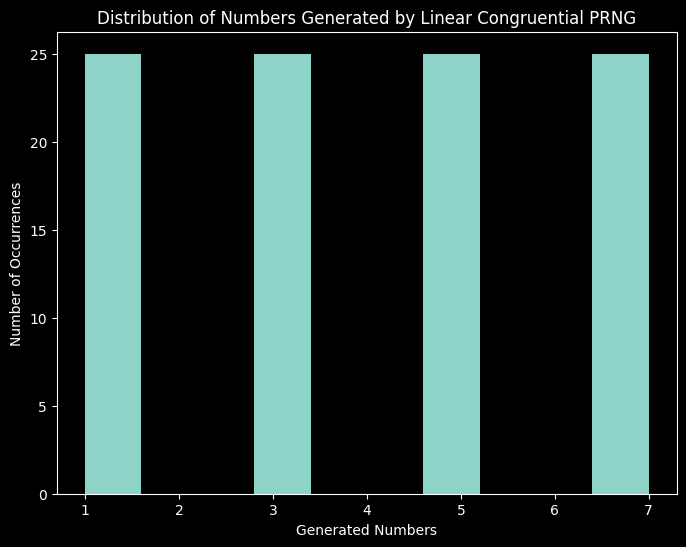

In [39]:
# 2. проверка равномерности
AMOUNT = 100

generated_numbers = [prg.next() for _ in range(AMOUNT)]
print(Counter(generated_numbers))

plt.figure(figsize=(8, 6))  # Set appropriate figure size
plt.hist(generated_numbers)
plt.xlabel('Generated Numbers')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Numbers Generated by Linear Congruential PRNG')
plt.show()

Распределение не является равномерным, т.к. равномерность подразумевает непрерывность. В нашем случае не выполняется условие:  

Плотность распределения этой случайной величины равна константе внутри интервала, на котором она распределена и равна 0 вне этого интервала.

In [ ]:
# 3. 